In [1]:
# TensorFlow and tf.keras - need them!
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# just a quick check point ...
print(tf.__version__)

#2024-02-11 15:45:20.003909: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, 
# GPU will not be used.
# TO-DO - why don't we install the cuda drivers .. we already have 'em anyways ...
# okay NVIDIA reports it can't see nvidia card, which means, ESXi must allow for me .. 
# Check: https://docs.vmware.com/en/VMware-Edge-Compute-Stack/1.0/ecs-enterprise-edge-ref-arch/GUID-19022CB0-8ABC-4CB3-A462-E43F569CD471.html
# for now, no cuda!

# download the dataset
# mnist = modified NIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# class names, so we can print it later
class_names = ['0 = T-Shirt/top', '1 = Trouser', '2 = Pullover', 
               '3 = Dress', '4 = Coat', '5 = Sandal', 
               '6 = Shirt', '7 = Sneaker', '8 = Bag', 
               '9 = Ankle Boot']

2024-02-11 17:46:45.243362: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-11 17:46:45.281372: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-11 17:46:45.607243: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 17:46:45.608402: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 17:46:45.669026: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

2.15.0


Training image shape: (60000, 28, 28)
Test image shape: (10000, 28, 28)
# of training labels:  60000
# of test labels:  10000
Training Labels 1st and last 3:  [9 0 0 ... 3 0 5]
Class =  ['0 = T-Shirt/top', '1 = Trouser', '2 = Pullover', '3 = Dress', '4 = Coat', '5 = Sandal', '6 = Shirt', '7 = Sneaker', '8 = Bag', '9 = Ankle Boot']
Label for this image =  9


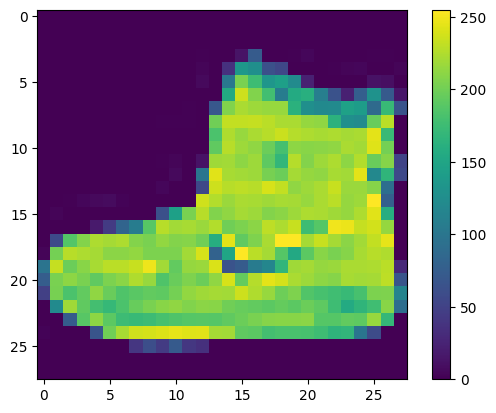

Class =  ['0 = T-Shirt/top', '1 = Trouser', '2 = Pullover', '3 = Dress', '4 = Coat', '5 = Sandal', '6 = Shirt', '7 = Sneaker', '8 = Bag', '9 = Ankle Boot']
Label for this image =  0


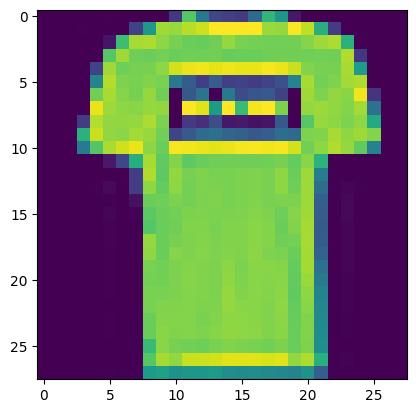

Class =  ['0 = T-Shirt/top', '1 = Trouser', '2 = Pullover', '3 = Dress', '4 = Coat', '5 = Sandal', '6 = Shirt', '7 = Sneaker', '8 = Bag', '9 = Ankle Boot']
Label for this image =  0


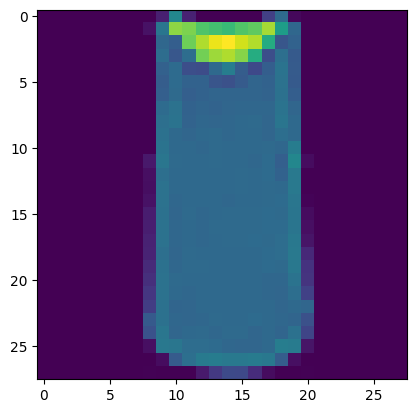

Class =  ['0 = T-Shirt/top', '1 = Trouser', '2 = Pullover', '3 = Dress', '4 = Coat', '5 = Sandal', '6 = Shirt', '7 = Sneaker', '8 = Bag', '9 = Ankle Boot']
Label for this image =  3


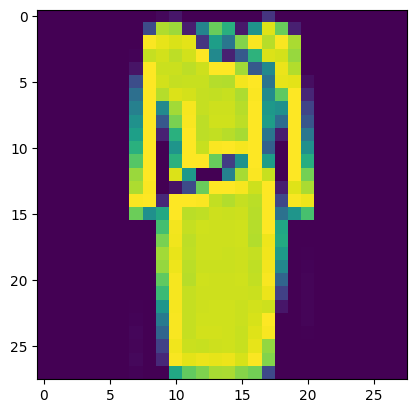

Class =  ['0 = T-Shirt/top', '1 = Trouser', '2 = Pullover', '3 = Dress', '4 = Coat', '5 = Sandal', '6 = Shirt', '7 = Sneaker', '8 = Bag', '9 = Ankle Boot']
Label for this image =  0


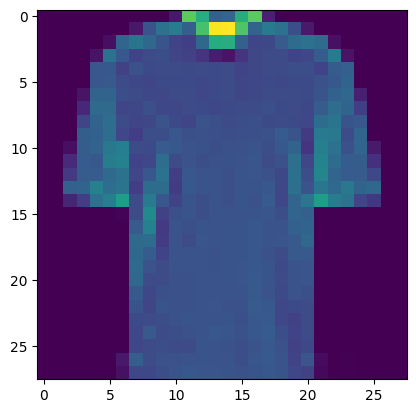

Class =  ['0 = T-Shirt/top', '1 = Trouser', '2 = Pullover', '3 = Dress', '4 = Coat', '5 = Sandal', '6 = Shirt', '7 = Sneaker', '8 = Bag', '9 = Ankle Boot']
Label for this image =  5


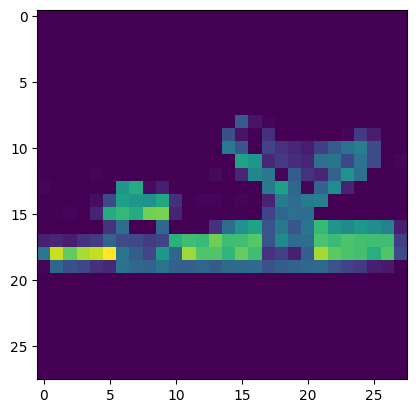

In [2]:
# tell us the shape of the training image set
print('Training image shape:', train_images.shape)
# 60K images, 28x28px

# we can do same for test/validation set
print('Test image shape:', test_images.shape)
#10K images, 28x28px

# we can do the same for the num of labels available, it will match the # of images
print('# of training labels: ', len(train_labels))
print('# of test labels: ', len(test_labels))

#each label is an integer between 0-9, corresponding to the number
# of classes we have, which is 10

print ('Training Labels 1st and last 3: ', train_labels)

# if you want to see ALL the labels
#for i in range (0,60000):
#    print ('label: ', i, ' = ', train_labels[i])

# if you want to see the 1st and last 3 images:
# this corresponds to the training labels:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
print('Class = ', class_names)
print('Label for this image = ', train_labels[0])
plt.show()

plt.imshow(train_images[1])
print('Class = ', class_names)
print('Label for this image = ', train_labels[1])
plt.show()

plt.imshow(train_images[2])
print('Class = ', class_names)
print('Label for this image = ', train_labels[2])
plt.show()

plt.imshow(train_images[59997])
print('Class = ', class_names)
print('Label for this image = ', train_labels[59997])
plt.show()

plt.imshow(train_images[59998])
print('Class = ', class_names)
print('Label for this image = ', train_labels[59998])
plt.show()

plt.imshow(train_images[59999])
print('Class = ', class_names)
print('Label for this image = ', train_labels[59999])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

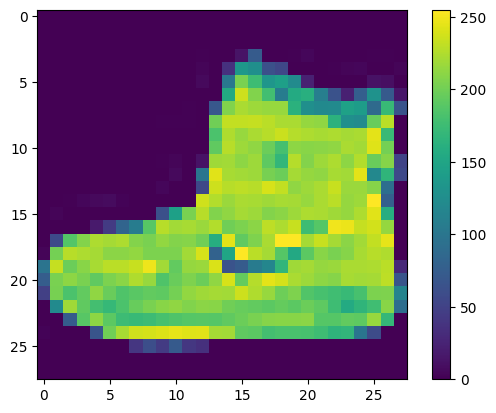

In [3]:
# preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show
# pre processing happens in next cell ...

In [4]:
# if you run this step more than once, results are going to shitty ...
# because we will keep reducing train_images and test_images ..
# this happened to me .. I was playing with the display w/o realizing I was further reducing the scale factor
# model accuracy was CRAP!!!

# just look at the test accuracy (from my initial run)
# 313/313 - 0s - loss: 2.3026 - accuracy: 0.1000 - 496ms/epoch - 2ms/step
# Test Accuracy:  0.10000000149011612

# thankfully, fix is easy, I'm going to restart kernel & startover.

# yup, much better results, post restarting kernel.
# 313/313 - 0s - loss: 0.3505 - accuracy: 0.8791 - 483ms/epoch - 2ms/step
#Test Accuracy:  0.8791000247001648 - # look @ the accuracy improvement! wow!


train_images = train_images / 255.0
test_images = test_images / 255.0

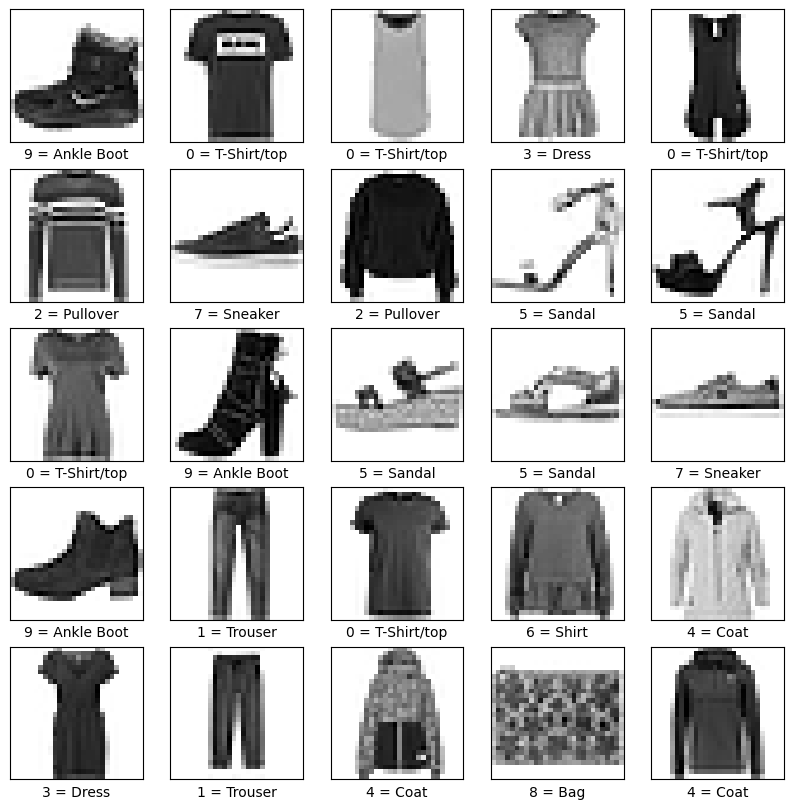

In [5]:
# to verify the data is in the correct format and we are ready
# let us display the first 25 images

plt.figure(figsize=(10,10))
for i in range (25):
    # I assume subplot 5,5 = 25 pic grid since we are printing 25 images
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
# okay, now we can design & setup the model itself
# straight sequential layers ...

model = tf.keras.Sequential([
    # 1st layer = flatten image data from matrix to 2d
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 2nd layer, building the nodes/neurons
    tf.keras.layers.Dense(128, activation = 'relu'),
    # 3rd and final layer returns a logits array with a length of 10 corresponding to our 10 classes
    tf.keras.layers.Dense(10)
])
print ('Model is built.')

Model is built.


In [7]:
# now on to compiling the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print('Model is compiled.')

Model is compiled.


In [8]:
# now we have to train the model using .fit

model.fit(train_images, train_labels, epochs=10)
print ('Model is trained.')

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4938 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3710 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3327 - accuracy: 0.8793
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3107 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2792 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2675 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [9]:
# lets evaluvate the accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy: ', test_acc)

#https://www.tensorflow.org/tutorials/keras/classification
#It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. 
#This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a 
#machine learning model performs worse on new, previously unseen inputs than it does on the training data. 
#An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively 
#impacts the performance of the model on the new data.

313/313 - 0s - loss: 0.3505 - accuracy: 0.8791 - 483ms/epoch - 2ms/step

Test Accuracy:  0.8791000247001648


In [10]:
# adding softmax for converting logits to probabilities
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
# layer added.
print('Softmax layer added')
# hmm .. why is the summary not showing the softmax layer? or is softmax not considered a layer? - most likely NO ... need to check.
model.summary()

Softmax layer added
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# now do the predictions
# predict with the test images!
predictions = probability_model.predict(test_images)
print ('predictions with test_images done!')

313/313 [==============================] - 0s 1ms/step
predictions with test_images done!


In [17]:
# print the predicted values
# just the of the first image from the test_images set ...
print(predictions[0])
# or 1 more ... the 2nd image
print('All predictions, values should look different ...\n ', predictions)

[3.3542438e-09 8.5320329e-09 6.2955541e-10 2.5430478e-09 2.9276457e-08
 1.1102717e-02 2.8684584e-08 2.1024302e-03 1.7223678e-08 9.8679477e-01]
All predictions, values should look different ...
  [[3.3542438e-09 8.5320329e-09 6.2955541e-10 ... 2.1024302e-03
  1.7223678e-08 9.8679477e-01]
 [1.0797857e-05 1.2362688e-14 9.9978656e-01 ... 3.5295420e-18
  1.0847724e-10 7.7231215e-18]
 [8.7595902e-07 9.9999905e-01 4.7170584e-10 ... 1.7172893e-24
  1.4592153e-14 8.5612115e-17]
 ...
 [4.3939730e-07 3.1829085e-11 1.2464498e-07 ... 5.1544884e-08
  9.9989736e-01 1.2551012e-13]
 [1.0030893e-06 9.9986124e-01 8.5131440e-08 ... 1.2394821e-15
  2.0926907e-09 1.1207175e-10]
 [1.3995729e-09 1.8519431e-11 3.8214871e-09 ... 2.4916543e-04
  1.9175804e-06 7.4717349e-07]]


In [13]:
# find max of this array, meaning the one with the highest confidence
print('I predict for test_image[0] ...', np.argmax(predictions[0]))
print('Actual Label of test_images[0]', test_labels[0])

I predict for test_image[0] ... 9
Actual Label of test_images[0] 9


In [49]:
# now we can define a function to graph the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Predct: {} with \n\n{:2.0f}% Confidence\n\nTrue: ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

print('function definitions done ...')


function definitions done ...


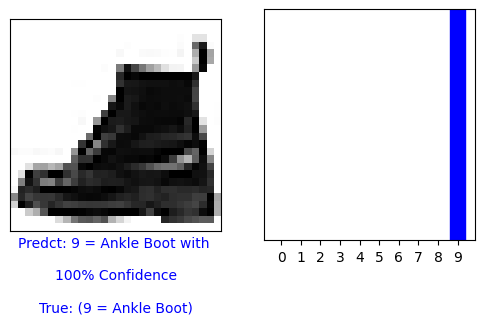

In [50]:
i = 2132
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

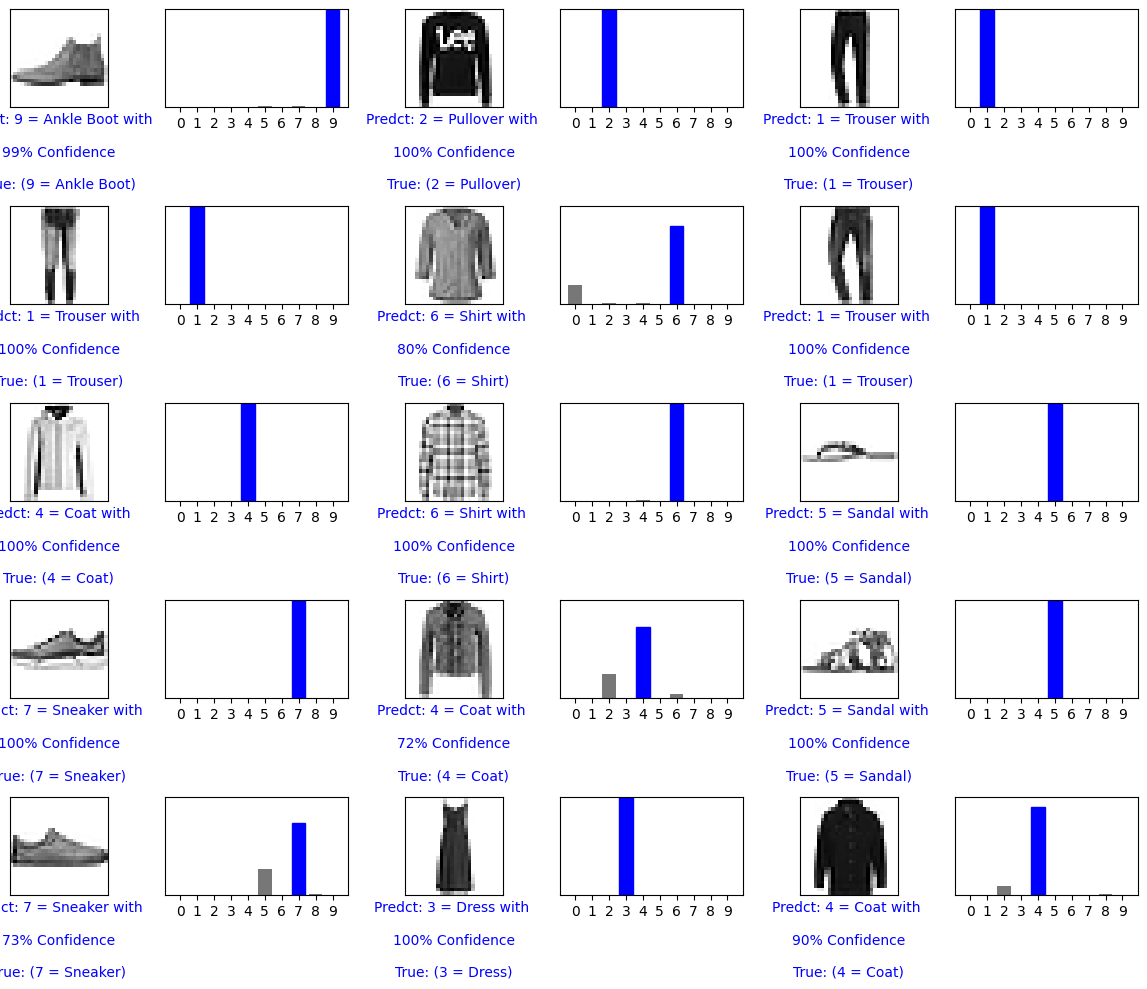

In [52]:
# Lets plot the same for the first 15 images .. 
num_rows = 5
num_cols=3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show

Test image shape =  (28, 28)
Actual Label =  1
Actual image = 


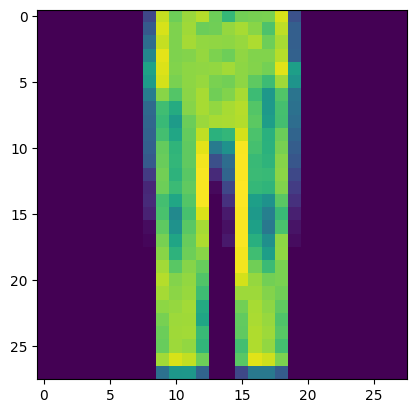

Same test image, but now as a batch/list:  (1, 28, 28)


In [63]:
# we know the model is working well, but we test it with 1 test image anyways
# 
# pick a random image from test_set of 1-10000
# we picked 3527
img = test_images[3527]
print ('Test image shape = ', img.shape)
print('Actual Label = ', test_labels[3527])
print('Actual image = ')
plt.imshow(img)
plt.show()

# add image to a batch, since tf.keras are optimized to make predictions on a batch or collections of examples at once.
# accordingly even though we are using a single image for test, we make this a list
img = (np.expand_dims(img,0))
print ('Same test image, but now as a batch/list: ', img.shape)

In [69]:
# predicting the class of the randomly chosen image
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[4.1836440e-08 1.0000000e+00 1.9450308e-11 5.4564900e-08 1.2650624e-10
  1.9641729e-16 3.5591932e-10 7.6580385e-29 1.3227642e-16 3.1680500e-19]]


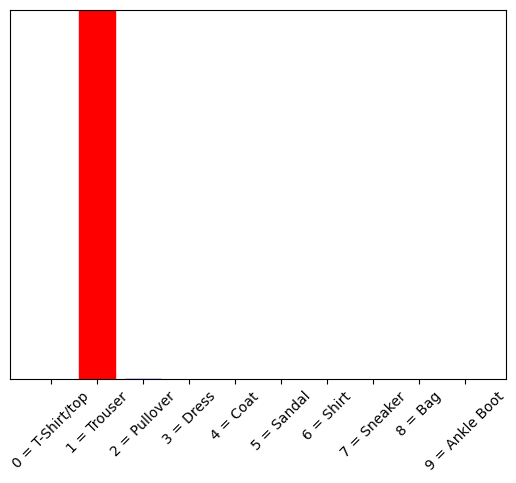

In [70]:
# Plotting it ...
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
# the prediction shows in RED because, plot uses red=prediction, blue=actual .. 
# the color in the chart does not indicate whethere the prediction is right or wrong ...

In [71]:
np.argmax(predictions_single[0])

1

In [75]:
# saving our model
tf.keras.models.save_model(model, "fashion-mnist-model-11Feb2024.keras")
print('Model saved')

Model saved
